## NLP Project 13: Metaphor detection in poetry

Danila Goncharenko, 2303788

Ana Ferreira, 2308587

Mikhail Bichagov, 2304806

### This project explores the detection of metaphors in poetry using natural language processing, aiming to distinguish figurative and non-figurative language. 

We shall consider the common use of a phrase as literal use and its violation as an indicative of metaphorical use. The project initially attempts to imitate the approach of Neuman et al. (2013) published in PlusOne journal -Metaphor Identification in Large Texts Corpora- available online [`Metaphor Identification in Large Texts Corpora (plos.org)`](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0062343). So first consider the British national corpus (BNCCorpus), available through NLTK (see also [`British National Corpus, XML edition (ox.ac.uk)`](https://ota.bodleian.ox.ac.uk/repository/xmlui/handle/20.500.12024/2554)). For testing, we shall consider the annotated corpus available at https://www.eecs.uottawa.ca/~diana/resources/metaphor/type1_metaphor_annotated.txt 

In the above, the annotation at the end of the sentence i.e., @1@y   indicates whether it is a metaphor (y) or not (n). Here the presence of ‘y’ indicates that it is a metaphor, whereas “1” indicates the first head word of the sentence, which is “poise”, in the part of speech tag sequence. 


In [1]:
# Imports
import nltk
import pandas as pd
from nltk.corpus import stopwords, CategorizedPlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist, bigrams
from itertools import chain

from nltk.collocations import *

# Downloading the BNC corpus and stopwords
nltk.download('stopwords')

# Stopwords, Lemmatizer, Bi-gram
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
bigram_measures = nltk.collocations.BigramAssocMeasures()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.corpus.reader.bnc import BNCCorpusReader

# CHANGE THE PATH
bnc_reader = BNCCorpusReader(root="C:/Users/Dan/Desktop/NLP Project/BNC/Texts", fileids=r'[A-K]/\w*/\w*\.xml')

# list_of_fileids = ['A/A0/A00.xml', 'A/A0/A01.xml']
# finder = BigramCollocationFinder.from_words(bnc_reader.words(fileids=list_of_fileids))
# scored = finder.score_ngrams(bigram_measures.raw_freq)

## Task 1

First, we shall consider the mutual information, see expression (2) in Neuman et al.’2003 paper, as a guideline to derive the metaphor-reasoning.  You can inspire from other available implementations of mutual information, in [`Collocations (nltk.org)`](https://www.nltk.org/howto/collocations.html), [`FNLP 2011: Tutorial 8: Working with corpora: mutual information (ed.ac.uk)`](http://www.inf.ed.ac.uk/teaching/courses/fnlp/lectures/8/tutorial.html). Consider the words “woman”, “use”, “dream”, “body”. Write a program that identifies all adjectives, adverbs and verbs that occur within 2 lexical units (span = 2 in the formula of mutual information) in BNC corpus and whose mutual information is equal or greater than 3, considered as the minimum statistical significance. Suggest appropriate adjustments (e.g., greater span) if no results are found to match the mutual information criterion.

### BNC Baby Corpus, diff formula

In [16]:
import nltk
from nltk.corpus.reader.bnc import BNCCorpusReader
from nltk import FreqDist, bigrams
from itertools import chain
from nltk.corpus import stopwords
from nltk.collocations import *
nltk.download('stopwords')


# Replace 'path_to_bnc_data' with the actual path to your downloaded BNC XML data
path_to_bnc_data = 'C:/Users/jklbichami/OneDrive - Valmet/Documents/School/Porgramming/NLP/bnc/Texts/news/'

# Initialize the BNC corpus reader
bnc_reader = BNCCorpusReader(root=path_to_bnc_data, fileids=r'[A-K]//w*//w*/.xml')


bigram_measures = nltk.collocations.BigramAssocMeasures()

# Here need to merge all of the words from different xlm files together.
# Its just an exmaple to show what it could look

corpus = bnc_reader.words('A1E.xml')

words_to_include = ['woman', 'use', 'dream', 'body']

# Get the words from the file in list format
es = stopwords.words('english')

g = FreqDist(bigrams(w.lower() for w in corpus if (w.isalpha() and w.lower() not in es)))

f = FreqDist()
for k in g.keys():
    if k[1] in words_to_include or k[0] in words_to_include:
        f[k] = g.get(k)

# Here we probably should not limit words by anything, except just removing stop words
u = FreqDist(w.lower() for w in corpus if (w.isalpha() and not(w.lower() in es)))

## If we have double nested list then we can use this to flatten it
chain.from_iterable(corpus)

from math import log
def mutInf(p,u1,u2,b):
    try:
        return log((float(b[p])/float(b.N()))/
                   ((float(u1[p[0]])*float(u2[p[1]]))/
                    (float(u1.N())*float(u2.N()))),
                   2)
    except:
        return

fmi = {}
for p in f.keys():
    fmi[p]  = mutInf(p,u,u,f)

fmi = {key: value for key, value in fmi.items() if value > 3}

dict(sorted(fmi.items(), key=lambda item: item[1], reverse=True))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jklbichami\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{('body', 'iosco'): 21.734829502493657,
 ('body', 'middlemen'): 20.734829502493657,
 ('regulators', 'body'): 20.734829502493657,
 ('regulatory', 'body'): 20.1498670017725}

In [7]:
from nltk import FreqDist, bigrams

In [23]:
import nltk
from nltk.corpus.reader.bnc import BNCCorpusReader
from nltk import FreqDist, bigrams
from itertools import chain
from nltk.corpus import stopwords
from nltk.collocations import *
nltk.download('stopwords')
import os
import glob
import zipfile


corpus = []

zip_file_path = 'C:/Users/jklbichami/OneDrive - Valmet/Documents/School/Porgramming/NLP/2554.zip'

bnc_reader = BNCCorpusReader(root=zip_file_path, fileids=r'[A-K]//w*//w*/.xml')

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List the files and folders in the zip archive
    file_list = zip_ref.namelist()

    for item in file_list:
        if 'download/Texts/' in item and item.endswith('.xml'):
            folder_name = item.rstrip('/')  # Extract folder name
            corpus.append(bnc_reader.sents(folder_name))

bigram_measures = nltk.collocations.BigramAssocMeasures()

words_to_include = ['woman', 'use', 'dream', 'body']

# Get the words from the file in list format
es = stopwords.words('english')


# Mikhail This part took 41 mins to load on my machine
g = FreqDist(bigrams(w.lower() for doc in corpus for sent in doc for w in sent if (w.isalpha() and w.lower() not in es)))

f = FreqDist()
for k in g.keys():
    if k[1] in words_to_include or k[0] in words_to_include:
        f[k] = g.get(k)

## Here we probably should not limit words by anything, except just removing stop words
u = FreqDist(w.lower() for w in chain.from_iterable(chain.from_iterable(corpus)) if (w.isalpha() and not(w.lower() in es)))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jklbichami\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Example how to export bigram to json
# Have to use extra function as json does not accept tuple as keys
import json

def remap_keys(mapping):
    return [{'key':k, 'value': v} for k, v in mapping.items()]

with open('bigram_bnc.json', 'w') as fp:
    json.dump(remap_keys(f), fp)

FreqDist({('per', 'cent'): 38049, ('gon', 'na'): 12436, ('last', 'year'): 10421, ('years', 'ago'): 10205, ('prime', 'minister'): 9467, ('last', 'night'): 8482, ('first', 'time'): 8379, ('would', 'like'): 8269, ('two', 'years'): 7427, ('united', 'states'): 7086, ...})

In [30]:
with open('bigram_bnc.json', 'r') as json_file:
    data = json.load(json_file)

f = {}
for i in data:
    f[tuple(i['key'])] = i['value']

f

## BNC full Corpus

### Expression (2) in Neuman et al.’2013 paper

In [20]:
# See expression (2) in Neuman et al.’2013 paper
import math
def Mutual_information(bigram_item, filteredCorpus, Corpus, span = 2):    
    '''
    Calculates Mutual information between node and collocate words
    bigram_item = The bigram which is considered in the equation
    filteredCorpus = The corpus with only considered words.
    Corpus = The whole corpus.
    span = span of words
    '''

    # filteredCorpus[fr_B_near_A] = frequency of collocate near the node word (e.g., color near purple)
    # Corpus.N() = size of the corpus (for instance 96,263,399, BNC)
    # Corpus[p[0]] = frequency of node word w1 (e.g., purple): 1262
    # Corpus[p[1]] = frequency of collocate word w2 (e.g., color): 115
    # span = span of words (e.g., 1 to left and 1 to right of the node word: 2)

    #sizeCorpus = 96 132 981 tokens in BNC

    try:
        return math.log10((filteredCorpus[bigram_item] * Corpus.N()) / (Corpus[bigram_item[0]] * Corpus[bigram_item[1]] * span))/math.log10(2)
    except:
        return 

### Frequencies calculation

In [21]:
# corpus = bnc_reader.words('A1E.xml')
corpus = bnc_reader.words('A/A0/A01.xml')

# Consider the words “woman”, “use”, “dream”, “body”.
words_to_include = ['woman', 'use', 'dream', 'body']

# Calculate the frequency of bigrams of all words in the corpus
bigram_frequency = FreqDist(bigrams(w.lower() for w in corpus if (w.isalpha() and w.lower() not in stop_words)))

# Calculate the frequency of bigrams of the words to include that are in the corpus
fr_words_to_include = FreqDist()
for key_word in bigram_frequency.keys():
    # If first or second word in bigram, e.g. ('woman', 'receiving'), has a word_to_include
    # Pass the frequency of this bigram from bigram_frequency to fr_words_to_include
    if key_word[1] in words_to_include or key_word[0] in words_to_include:
        fr_words_to_include[key_word] = bigram_frequency.get(key_word)

# Frequency of all words in the corpus, except stop words
unigram_frequency = FreqDist(w.lower() for w in corpus if (w.isalpha() and not(w.lower() in stop_words)))

### Calculate Mutual information frequency

In [22]:
## If we have double nested list then we can use this to flatten it
chain.from_iterable(corpus)

# Identify all adjectives, adverbs and verbs that occur within 2 lexical units (span = 2 in the formula of mutual information) in BNC corpus
# Mutual information frequency
fmi = {}
for p in fr_words_to_include.keys():
    fmi[p]  = Mutual_information(p, fr_words_to_include, unigram_frequency)

# Mutual information is equal or greater than 3, considered as the minimum statistical significance
fmi = {key: value for key, value in fmi.items() if value > 3}

dict(sorted(fmi.items(), key=lambda item: item[1], reverse=True))

{('woman', 'receiving'): 9.925183519434208,
 ('illness', 'woman'): 8.925183519434208,
 ('multiplies', 'body'): 8.603255424546846,
 ('body', 'seriously'): 8.603255424546846,
 ('damage', 'body'): 8.603255424546846,
 ('body', 'kill'): 8.603255424546846,
 ('enters', 'body'): 7.603255424546846,
 ('body', 'enough'): 7.603255424546846,
 ('weakened', 'body'): 7.603255424546846,
 ('words', 'use'): 6.925183519434207,
 ('cells', 'body'): 6.6032554245468456,
 ('body', 'much'): 6.6032554245468456,
 ('use', 'condom'): 6.340221018713052,
 ('use', 'legacy'): 6.340221018713052,
 ('always', 'use'): 5.340221018713052,
 ('value', 'use'): 5.340221018713052,
 ('body', 'get'): 5.143823805909549,
 ('leaflet', 'use'): 4.925183519434208,
 ('could', 'use'): 4.2247438012931156,
 ('use', 'drugs'): 3.7552585179918956,
 ('use', 'deed'): 3.603255424546846,
 ('income', 'use'): 3.401621563377195,
 ('payment', 'use'): 3.0672025243066363,
 ('people', 'use'): 3.0182929238256895}

### Suggest appropriate adjustments (e.g., greater span), if no results

In [ ]:
# Suggest appropriate adjustments (e.g., greater span), if no results

## Task 2

We would like to test this process in the previous metaphor annotated dataset. For this purpose, consider the following approach. Write a program that inputs each sentence of the annotated corpus, and then reads the head word (given in the annotation), then calculate the mutual distance between the head-word and each of the first two words occurring either on the left hand side part or right hand side part of the head-word. If the average of mutual distances from head word to each of the two words situated at two lexical units is greater than 3, then we shall consider the sentence is not a metaphor, otherwise, it is a metaphor. Test this reasoning and report the result for each annotated sentence and save it in your database. Given the ground truth of the annotated dataset, calculate the corresponding accuracy, and comment on the efficiency of the proposed approach.

In [3]:
# Input each sentence of the annotated corpus

# Read the head word (given in the annotation)

# Calculate the mutual distance between the head-word and each of the first two words
# either on the left hand side part or right hand side part of the head-word.

import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from itertools import chain
import math

stopwords = set(stopwords.words("english"))

In [4]:
url = "https://www.eecs.uottawa.ca/~diana/resources/metaphor/type1_metaphor_annotated.txt"

# this file is the downloaded text of the content of the above url
# it is exactly the same
file = 'type1_metaphor_annotated.txt'
# file = 'type1_metaphor_annotated.txt'

# Read the data into a DataFrame
# df = pd.read_csv(url, delimiter='\t', header=None, names=['Text'])

with open(file, 'r') as file:
    # Read the contents of the file
    file_contents = file.read()

lines = file_contents.split('\n')
data = [line.split('\t') for line in lines if line]

df = pd.DataFrame(data, columns = ['Text'])

#print(df[109:110])

# Extract the symbol ('y', 'n' or 's') and number into separate columns
df['Symbol'] = df['Text'].str.extract(r'@(\d+)@([yns])')[1] # add the s
df['Number'] = df['Text'].str.extract(r'@(\d+)@([yns])')[0]

# Take away the 's' symbol because it means skipped sentence and we only
# want the 'y' or 'n' symbols which tell us if the text is a metaphor or not

df = df[df['Symbol'] != 's']

# Reset the index
df.reset_index(drop=True, inplace=True)

# Delete it from the original text
df['Text'] = df['Text'].str.replace(r'(@\d+@y|@\d+@n)', '', regex=True)

# Replace NaN values in 'Number' with 0, and then convert to integer
df['Number'] = df['Number'].fillna(0).astype(int)

# Extract the word with the specified index and save it in the 'Head-word' column
df['Head-word'] = df.apply(lambda row: row['Text'].split()[int(row['Number']) - 1], axis=1)

# check if the symbols in the 'Symbol' column are only either 'y' or 'n'

unique_symbols = df['Symbol'].unique()

unique_symbols_list = list(unique_symbols)

#print(unique_symbols_list)

# Display the resulting DataFrame
df

,Text,Symbol,Number,Head-word
0,poise is a club .,y,1,poise
1,destroying alexandria . sunlight is silence,y,4,sunlight
2,feet are no anchor . gravity sucks at the mind,y,1,feet
3,on the day 's horizon is a gesture of earth,y,5,horizon
4,he said good-by as if good-by is a number .,y,6,good-by
...,...,...,...,...
675,as the season of cold is the season of darkness,n,5,cold
676,"else all beasts were tigers ,",y,3,beasts
677,without which earth is sand,n,3,earth
678,the sky is cloud on cloud,n,2,sky


Niave Baises model

Neurral Network CNN model

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

texts = df['Text']

tokenizer = Tokenizer()
# Fit the tokenizer on the text data
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_seq_length = max(len(x) for x in sequences)

word_index = tokenizer.word_index

In [21]:
padded_texts

array([[  0,   0,   0, ...,   2,   3, 547],
       [  0,   0,   0, ..., 303,   2, 153],
       [  0,   0,   0, ...,  51,   1,  89],
       ...,
       [  0,   0,   0, ...,  60,   2, 477],
       [  0,   0,   0, ..., 176,  44, 176],
       [  0,   0,   0, ...,  62,   2, 494]])

In [58]:
padded_texts = pad_sequences(sequences, max_seq_length)

glove_file = r'C:\Users\jklbichami\OneDrive - Valmet\Documents\School\Porgramming\NLP\glove.6B.300d.txt' 
 # Change to the GloVe file you have
embedding_dim = 300


embeddings_index = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [59]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [41]:
train_size = int(0.6 * len(padded_texts))
val_size = int(0.2 * len(padded_texts))
test_size = len(padded_texts) - train_size - val_size

dataset = tf.data.Dataset.from_tensor_slices((padded_texts, np.array(df['Symbol'])))
dataset = dataset.shuffle(buffer_size=10, seed=42)

# Split the dataset
train_dataset = dataset.take(train_size)
remaining_dataset = dataset.skip(train_size)
val_dataset = remaining_dataset.take(val_size)
test_dataset = remaining_dataset.skip(val_size)

In [65]:
## This one works, need to figure out why just for myself

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input
from tensorflow.keras.models import Model

# Load your DataFrame with text and labels
# df = pd.read_csv('your_dataset.csv')  # Replace with your data loading logic

# Tokenization and padding
#max_sequence_length = 100  # Define your desired sequence length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=max(len(x) for x in sequences))
max_sequence_length = max(len(x) for x in sequences)

# Load pre-trained GloVe embeddings (replace with the actual file path)
glove_file = r'C:\Users\jklbichami\OneDrive - Valmet\Documents\School\Porgramming\NLP\glove.6B.300d.txt' 
embedding_dim = 300

embeddings_index = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the CNN model
input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_sequence_length,
                            trainable=False)(input_layer)
conv_layer = Conv1D(128, 5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
output_layer = Dense(1, activation='sigmoid')(pooling_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split your data into train and test sets
from sklearn.model_selection import train_test_split
label_mapping = {'y': 1, 'n': 0}
df['Symbol'] = df['Symbol'].map(label_mapping)
X_train, X_test, y_train, y_test = train_test_split(X, df['Symbol'], test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
17/17 [==============================] - 1s 50ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
17/17 [==============================] - 1s 43ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
17/17 [==============================] - 1s 36ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
17/17 [==============================] - 1s 36ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
17/17 [==============================] - 1s 38ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
17/17 [==============================] - 1s 40ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
17/17 [==============================] - 1s 37ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00

### Extract content

In [21]:
# this function basically takes each sentence from the column 'Text', each head word index from the column 'Head-word'
# and the window_size (2, because we want to see two words left and right from the head word (it is not the same concept as span))

# this function was made because the index of the head word takes into account elements of the string that are puntuaction
# (for example: '-- the others were the despots of despair -- @3@y' in this sentence the character -- is taken into account
# in the count of the head word (others) index)
# because of this, this function evaluates which words contain at least one letter and are not stopwords, returns a boolean
# and saves the indexes that fulfill these conditions in the sentence to a variable called 'found_indices'
# then it finds the index in the list of the sentences indexes which the value is equal to the head word index ('target_index')
# after that it extracts the 2 indexes of the words to the left and to the right of the head word that are in 'found_indices'
# then it slices 'found_indices' to extract a window with span = 4 (like it says in the 2nd assessment)
# after that it uses the numpy array function to extract the words from the vector 'words' in the same indexes as the list 'indeces'
# and put them in the variable 'selected_elements' which is returned by the function to the caller

# this function is called to each row of the column 'Text' in the dataframe 'df'

def extract_context(text, target_index, window_size):
    # split the text list into words
    words = text.split()
    
    # Use a list comprehension to check if each element contains at least a letter (some words have a hyphen like good-by)
    # and if the words are not in stopwords
    # the result is a boolean vector that represents which words in the vector satisfy the conditions
    contains_words = [bool(re.search(r'[a-zA-Z]', word)) and word not in stopwords and not re.match(r'^[^a-zA-Z]*s[^a-zA-Z]*$', word) for word in words]

    # Find all the 'True' occurrences using vectorized operations
    # Get the indices of those ocurrences in the words list
    found_indices = np.where(contains_words)[0]

    # if nothing is found return an empty list
    if found_indices.size == 0:
        return []
        
    # Get the index in the found_indices list of the head word index in the words list
    index = np.where(found_indices == target_index)[0][0]

    # make sure that the index two places to the left from found_indices that corresponds to the head word index in the words list is not out of bounds
    start = max(0, index - window_size)
    # make sure that the index two places to the right from found_indices that corresponds to the head word index in the words list is not out of bounds
    end = min(len(found_indices), index + window_size + 1)

    # slice the found_indices list to get the desired span (in this case 4 which means that the window is 2)
    indeces = found_indices[start:end]

    # Access elements in the list words which their corresponding indexes are in the list indeces, using the NumPy array function
    selected_elements = np.array(words)[indeces]
    
    return selected_elements

### Filter the annotated text, put sentences from filtered Text into a list with tokens, create bigrams from the list

In [22]:
# Use the apply method to extract the head-word and each of the first two words
# either on the left hand side part or right hand side part of the head-word

# this expression calls the function extract_context for every row in the df dataframe
list_of_lists = df.apply(lambda row: extract_context(row['Text'], int(row['Number']) - 1, 2), axis=1)

# take away every element in every sublist of list_of_lists that does not have at least one letter or a hyphen (some words are hyphenated)
list_of_lists = [[re.sub(r'[^a-zA-Z-]', '', word) for word in sublist] for sublist in list_of_lists]

# eliminate every element in every sublist of list_of_lists that is an empty string
list_of_lists = [[word for word in sublist if word != ''] for sublist in list_of_lists]

# get a single list of all the bigrams in the list_of_lists, which is a list that contains a list for every row in
# the df dataframe with the words in the desired span (in this case 4)
# it is also worth noting that sometimes the span is not 4 because there were not enough words to the right or to the left of the head word
bigrams_interest = [bigram for sublist in list_of_lists for bigram in list(bigrams(sublist))]

# list that contains a list for of the bigrams for every row
# it is added to the column 'Bigrams'
df['Bigrams'] = [list(bigrams(sublist)) for sublist in list_of_lists]

#print(df)
#has_none_values = df['Bigrams'].isna().any()

print(list_of_lists)
print(bigrams_interest)
# print(type(list_of_lists))

#text_column_list = df['Text'].tolist()

[['poise', 'club'], ['destroying', 'alexandria', 'sunlight', 'silence'], ['feet', 'anchor', 'gravity'], ['day', 'horizon', 'gesture', 'earth'], ['said', 'good-by', 'good-by', 'number'], ['although', 'eyes', 'lakes', 'dies'], ['ways', 'world', 'taxi', 'enter'], ['poet', 'man', 'feigns'], ['man', 'animal', 'needs'], ['name', 'james', 'wright'], ['earth', 'door', 'cannot'], ['hackles', 'neck', 'fear', 'grief'], ['moon', 'sow'], ['earth', 'birth', 'blues'], ['nature', 'understanding', 'one', 'simple'], ['real', 'terror', 'nature', 'humanity', 'enraged'], ['love', 'word', 'another'], ['goodbye', 'promise', 'lightning'], ['broken', 'body', 'afterimage', 'st'], ['eyes', 'caves', 'chunks'], ['sky', 'baby', 'blue'], ['road', 'somebody', 'small'], ['wrote', 'life', 'strain', 'later'], ['clear', 'mr', 'haggard', 'ryder', 'brother'], ['mind', 'city', 'like'], ['others', 'despots', 'despair'], ['intuitively', 'sense', 'humor', 'necessity'], ['guilt', 'nameless', 'name', 'time'], ['name', 'death', '

### Put all unfiltered sentences from Text into a list with tokens

In [23]:
# list that contains a list for every row with the words of the column 'Text'
word_lists = [text.split() for text in df['Text']]

# take away every element in every sublist of word_lists that does not have at least one letter or a hyphen (some words are hyphenated)
word_lists = [[re.sub(r'[^a-zA-Z-]', '', word) for word in sublist] for sublist in word_lists]

# eliminate every element in every sublist of word_lists that is an empty string
word_lists = [[word for word in sublist if word != ''] for sublist in word_lists]

print(word_lists)

[['poise', 'is', 'a', 'club'], ['destroying', 'alexandria', 'sunlight', 'is', 'silence'], ['feet', 'are', 'no', 'anchor', 'gravity', 'sucks', 'at', 'the', 'mind'], ['on', 'the', 'day', 's', 'horizon', 'is', 'a', 'gesture', 'of', 'earth'], ['he', 'said', 'good-by', 'as', 'if', 'good-by', 'is', 'a', 'number'], ['although', 'your', 'eyes', 'be', 'lakes', 'dies'], ['ways', 'as', 'if', 'the', 'world', 'were', 'a', 'taxi', 'you', 'enter', 'it', 'then'], ['the', 'poet', 'is', 'a', 'man', 'who', 'feigns'], ['man', 'is', 'an', 'animal', 'that', 'needs', 'a', 'warden'], ['my', 'name', 'is', 'james', 'a', 'wright', 'and', 'i', 'was', 'born'], ['earth', 'is', 'a', 'door', 'i', 'cannot', 'even', 'face'], ['the', 'hackles', 'on', 'my', 'neck', 'are', 'fear', 'not', 'grief'], ['the', 'moon', 'is', 'a', 'sow'], ['earth', 'is', 'the', 'birth', 'of', 'the', 'blues', 'sang', 'yellow', 'bertha'], ['about', 'the', 'nature', 'of', 'understanding', 'no', 'one', 'is', 'that', 'simple'], ['the', 'real', 'terro

### Every bigram without stopwords in every unfiltered sentence from Text

In [24]:
# creates a single list with every bigram in every sentence of the annotated corpus
# it also selects the words that contain at least a letter and are not stopwords
bigrams_lists = [bigram for sublist in word_lists for bigram in list(bigrams(w.lower() for w in sublist if (re.match(r'[a-zA-Z]', w) and w.lower() not in stopwords)))]

# transform word_lists into a single list
words = list(chain.from_iterable(word_lists))

print(bigrams_lists)

[('poise', 'club'), ('destroying', 'alexandria'), ('alexandria', 'sunlight'), ('sunlight', 'silence'), ('feet', 'anchor'), ('anchor', 'gravity'), ('gravity', 'sucks'), ('sucks', 'mind'), ('day', 'horizon'), ('horizon', 'gesture'), ('gesture', 'earth'), ('said', 'good-by'), ('good-by', 'good-by'), ('good-by', 'number'), ('although', 'eyes'), ('eyes', 'lakes'), ('lakes', 'dies'), ('ways', 'world'), ('world', 'taxi'), ('taxi', 'enter'), ('poet', 'man'), ('man', 'feigns'), ('man', 'animal'), ('animal', 'needs'), ('needs', 'warden'), ('name', 'james'), ('james', 'wright'), ('wright', 'born'), ('earth', 'door'), ('door', 'cannot'), ('cannot', 'even'), ('even', 'face'), ('hackles', 'neck'), ('neck', 'fear'), ('fear', 'grief'), ('moon', 'sow'), ('earth', 'birth'), ('birth', 'blues'), ('blues', 'sang'), ('sang', 'yellow'), ('yellow', 'bertha'), ('nature', 'understanding'), ('understanding', 'one'), ('one', 'simple'), ('real', 'terror'), ('terror', 'nature'), ('nature', 'humanity'), ('humanity',

### Mutual information of every bigram

In [43]:
bigram_frequency

FreqDist({('dead', 'man'): 9, ('frog', 'frog'): 5, ('love', 'love'): 4, ('young', 'dead'): 4, ('old', 'dead'): 4, ('man', 'bread'): 4, ('liar', 'liar'): 4, ('ca', 'nt'): 3, ('purple', 'moor'): 3, ('sugar', 'love'): 3, ...})

In [25]:
bigram_frequency = FreqDist(bigrams_lists)

# Calculate the frequency of bigrams of the words in the pre-defined window

frequencies_of_interest = {bigram: bigram_frequency[bigram] for bigram in bigrams_interest}

# print(frequencies_of_interest)

# Frequency of all words in the annotation

unigram_frequency = FreqDist(w.lower() for w in words if (re.match(r'[a-zA-Z]', w) and w.lower() not in stopwords))

# Calculate the mutual distance

# See expression (2) in Neuman et al.’2013 paper

def Mutual_information(bigram_item, filteredCorpus, Corpus, span = 2):    
    '''
    Calculates Mutual information between node and collocate words
    bigram_item = The bigram which is considered in the equation
    filteredCorpus = The corpus with only considered words.
    Corpus = The whole corpus.
    span = span of words
    '''

    try:
        return math.log10((filteredCorpus[bigram_item] * Corpus.N()) / (Corpus[bigram_item[0]] * Corpus[bigram_item[1]] * span))/math.log10(2)
    except:
        return

# calculate mutual information for each of the bigrams in the desired span in each sentence of the annotated corpus
fmi = {bigram: Mutual_information(bigram, frequencies_of_interest, unigram_frequency, span = 4) for bigram in bigrams_interest}

print(fmi)

{('poise', 'club'): 9.560810468727942, ('destroying', 'alexandria'): 9.560810468727942, ('alexandria', 'sunlight'): 8.56081046872794, ('sunlight', 'silence'): 6.560810468727941, ('feet', 'anchor'): 6.560810468727941, ('anchor', 'gravity'): 8.56081046872794, ('day', 'horizon'): 5.390885467285629, ('horizon', 'gesture'): 8.56081046872794, ('gesture', 'earth'): 6.101378850090644, ('said', 'good-by'): 5.238882373840578, ('good-by', 'good-by'): 7.560810468727941, ('good-by', 'number'): 8.56081046872794, ('although', 'eyes'): 6.753455546670336, ('eyes', 'lakes'): 5.753455546670336, ('lakes', 'dies'): 8.56081046872794, ('ways', 'world'): 4.275408249865692, ('world', 'taxi'): 5.860370750586849, ('taxi', 'enter'): 9.560810468727942, ('poet', 'man'): 3.6066141583410656, ('man', 'feigns'): 4.606614158341066, ('man', 'animal'): 4.606614158341066, ('animal', 'needs'): 9.560810468727942, ('name', 'james'): 5.390885467285629, ('james', 'wright'): 9.560810468727942, ('earth', 'door'): 4.51641634936948

### Mutual distance of every bigram

In [26]:
# eliminate the elements that had value equal to 'None'
fmi = {key: value for key, value in fmi.items() if value is not None}

# find the key which has the maximum value
max_key = max(fmi, key=fmi.get)

# find the maximum value
# this value will be the constant K in the formula given by the professor:
# distance (S1, S2) = K – Mutual_Information (S1, S2)
# this way the distance will be the lowest to the bigram with the highest mutual information value and we avoid having negative values
max_value = fmi[max_key]

#print(max_value)
# calculate the distance between every bigram in the desired span using the values in the dictionary fmi
# formula is written above
mutual_distance = {key: max_value - value for key, value in fmi.items()}

#print({key: value for key, value in mutual_distance.items() if value <= 3})

# Report the result for each annotated sentence
# If average is greater than 3, sentence is not a metaphor, so we will choose only the bigrams that indicate the presence of a metaphor
metaphor_mutual_distance = {key: value for key, value in mutual_distance.items() if value <= 3}

# Save it in your database



### Find metaphors

In [27]:
# Create a function to see if the bigrams in the keys of the dictionary metaphor_mutual_distance are
# in the bigrams associated to each sentence in the df dataframe
# if the bigrams associated to the current sentence in analysis are in the dictionary metaphor_mutual_distance,
# the return value is 'y' to simbolize a metaphor, otherwise it is 'n'
def find_metaphor(bigrams, metaphor):
    m = [bigram for bigram in bigrams if bigram in metaphor]
    if m == []:
        return 'n'
    else:
        return 'y'

In [28]:
# Apply the function to every row of the 'Bigrams' column
df['Metaphor'] = df.apply(lambda row: find_metaphor(row['Bigrams'], metaphor_mutual_distance), axis=1)

# Calculate the corresponding accuracy

# calculate True Positives

TP = (df['Symbol'] == 'y') & (df['Metaphor'] == 'y')
TP = TP.sum()

#print(TP)

# calculate True Negatives

TN = (df['Symbol'] == 'n') & (df['Metaphor'] == 'n')
TN = TN.sum()

#print(TN)

# calculate False Positives

FP = (df['Symbol'] == 'n') & (df['Metaphor'] == 'y')
FP = FP.sum()

#print(FP)

# calculate False Negatives

FN = (df['Symbol'] == 'y') & (df['Metaphor'] == 'n')
FN = FN.sum()

#print(FN)

# accuracy = correctly classified instances / all instances
accuracy = (TP + TN) / df.shape[0]
formatted_accuracy = "{:.2f}%".format(accuracy * 100)

print('Accuracy:', formatted_accuracy)

# Comment on the efficiency of the proposed approach.

print('The efficiency is not that great since we only got, approximately, half of the predictions correct.')

Accuracy: 56.62%
The efficiency is not that great since we only got, approximately, half of the predictions correct.


## Task 3

We consider the (adjective-noun) type of metaphor (referred to as Metaphor type III). A metaphor  assumes to occur when the categories of noun and adjective are such that one is concrete and the other one is abstract. WordStat noun categorization based on WordNet, which classifies 69,817 nouns into 25 categories, of which 13 are concrete categories (e.g., artifact) provides a database for a such categorization. It is freely available in [`Wordnet based categorization dictionary - Provalis Research`](https://provalisresearch.com/products/content-analysis-software/wordstat-dictionary/wordnet-based-categorization-dictionary/). Write a program that allows you to retrieve the category of noun and adjective / adverb in a sentence according to WordStat.

In [4]:
# adjective-noun type of metaphor is a Metaphor type III.

# If categories of noun and adjective: one is concrete and the other one is abstract,
# Then it is a Metaphor.

# WordStat noun categorization based on WordNet provides a database for a such categorization.

# Retrieve the category of noun and adjective / adverb in a sentence according to WordStat.


In [3]:
import json
import pandas as pd
import nltk
from nltk.corpus.reader.bnc import BNCCorpusReader
from nltk import FreqDist, bigrams
import re

file_p = r'C:\Users\jklbichami\OneDrive - Valmet\Documents\School\Porgramming\NLP\WordNet2\WordNet Words & Phrases.CAT'

with open(file_p, 'r') as file:
    cat_data = file.readlines()

pattern = r'\.(.+)'

topics = [a.strip('\n') for a in cat_data if '\t' not in a ]
topics_indices = [cat_data.index(a + '\n') for a in topics]

noun_categories = [re.search(pattern, a).group(1).strip('\n') for a in cat_data if '\t\t' not in a and a.startswith('\tNOUN.')]
noun_categories_idices = [cat_data.index('\tNOUN.' + a + '\n') for a in noun_categories]

verb_categories = [re.search(pattern, a).group(1).strip('\n') for a in cat_data if '\t\t' not in a and a.startswith('\tVERB.')]
verb_categories_idices = [cat_data.index('\tVERB.' + a + '\n') for a in verb_categories]

adj_categories = [re.search(pattern, a).group(1).strip('\n') for a in cat_data if '\t\t' not in a and a.startswith('\tADJ.')]
adj_categories_idices = [cat_data.index('\tADJ.' + a + '\n') for a in adj_categories]

cat_df = pd.DataFrame(columns=['Type', 'Category', 'Word'])


## Mikhail: did not finish this but idea is pretty simple
## 1. We get the indeces of all topics
## 2. We get indeces for respective categories
## 3. We iterate through each topics
## 4. We iterate through their categories
## 5. Assign all results to df based on indices
## Here is examplee for Nouns
for indx, num in enumerate(noun_categories_idices):
    temp_dict = {}
    if indx == 0:
        temp_dict['Category'] = [noun_categories[indx]]*abs(cat_data.index('NOUNS\n')+1-noun_categories_idices[indx+1]+1)
        temp_dict['Type'] = ['Noun']*abs(cat_data.index('NOUNS\n')+1-noun_categories_idices[indx+1]+1)
        temp_dict['Word'] = [a[2:].strip(' (1)\n)').lower() for a in  cat_data[cat_data.index('NOUNS\n')+2:noun_categories_idices[indx+1]]]
        cat_df = pd.concat([cat_df, pd.DataFrame(temp_dict)], ignore_index=True)
    else:
        try:
            temp_dict['Category'] = [noun_categories[indx]]*abs(noun_categories_idices[indx]+1-noun_categories_idices[indx+1])
            temp_dict['Type'] = ['Noun']*abs(noun_categories_idices[indx]+1-noun_categories_idices[indx+1])
            temp_dict['Word'] = [a[2:].strip(' (1)\n)').lower() for a in  cat_data[noun_categories_idices[indx]+1:noun_categories_idices[indx+1]]]
            cat_df = pd.concat([cat_df, pd.DataFrame(temp_dict)], ignore_index=True)
        except IndexError:
            pass

for indx, num in enumerate(verb_categories):
    temp_dict = {}
    if indx == 0:
        temp_dict['Category'] = [verb_categories[indx]]*abs(cat_data.index('VERBS\n')+1-verb_categories_idices[indx+1]+1)
        temp_dict['Type'] = ['Verb']*abs(cat_data.index('VERBS\n')+1-verb_categories_idices[indx+1]+1)
        temp_dict['Word'] = [a[2:].strip(' (1)\n)').lower() for a in  cat_data[cat_data.index('VERBS\n')+2:verb_categories_idices[indx+1]]]
        cat_df = pd.concat([cat_df, pd.DataFrame(temp_dict)], ignore_index=True)
    else:
        try:
            temp_dict['Category'] = [verb_categories[indx]]*abs(verb_categories_idices[indx]+1-verb_categories_idices[indx+1])
            temp_dict['Type'] = ['Verb']*abs(verb_categories_idices[indx]+1-verb_categories_idices[indx+1])
            temp_dict['Word'] = [a[2:].strip(' (1)\n)').lower() for a in  cat_data[verb_categories_idices[indx]+1:verb_categories_idices[indx+1]]]
            cat_df = pd.concat([cat_df, pd.DataFrame(temp_dict)], ignore_index=True)
        except IndexError:
            pass

for indx, num in enumerate(adj_categories):
    temp_dict = {}
    if indx == 0:
        temp_dict['Category'] = [adj_categories[indx]]*abs(cat_data.index('ADJECTIVES\n')+1-adj_categories_idices[indx+1]+1)
        temp_dict['Type'] = ['Adjective']*abs(cat_data.index('ADJECTIVES\n')+1-adj_categories_idices[indx+1]+1)
        temp_dict['Word'] = [a[2:].strip(' (1)\n)').lower() for a in  cat_data[cat_data.index('ADJECTIVES\n')+2:adj_categories_idices[indx+1]]]
        cat_df = pd.concat([cat_df, pd.DataFrame(temp_dict)], ignore_index=True)
    else:
        try:
            temp_dict['Category'] = [adj_categories[indx]]*abs(adj_categories_idices[indx]+1-adj_categories_idices[indx+1])
            temp_dict['Type'] = ['Adjective']*abs(adj_categories_idices[indx]+1-adj_categories_idices[indx+1])
            temp_dict['Word'] = [a[2:].strip(' (1)\n)').lower() for a in  cat_data[adj_categories_idices[indx]+1:adj_categories_idices[indx+1]]]
            cat_df = pd.concat([cat_df, pd.DataFrame(temp_dict)], ignore_index=True)
        except IndexError:
            pass

temp_dict = {}
temp_dict['Category'] = ['All']*abs(cat_data.index('ADVERBS\n')+2-cat_data.index('NOUNS\n'))
temp_dict['Type'] = ['Adverb']*abs(cat_data.index('ADVERBS\n')+2-cat_data.index('NOUNS\n'))
temp_dict['Word'] = [a[2:].strip(' (1)\n)').lower() for a in  cat_data[cat_data.index('ADVERBS\n')+2:cat_data.index('NOUNS\n')]]
cat_df = pd.concat([cat_df, pd.DataFrame(temp_dict)], ignore_index=True)



In [44]:
cat_df['Type'].value_counts()

Type
Noun         128014
Verb          17938
Adverb         4667
Adjective      4374
Name: count, dtype: int64

In [4]:
# Here is just an example how to get words
from nltk.tokenize import word_tokenize
sent = 'I love exceptional food with green salad'
to = word_tokenize(sent)
res = [(a, 
        list(cat_df['Category'][cat_df['Word'] == a]), 
        list(cat_df['Type'][cat_df['Word'] == a])) 
                for a in to]

In [109]:
res

[('I', [], []),
 ('love',
  ['ACT', 'COGNITION', 'FEELING', 'PERSON', 'QUANTITY', 'CONTACT', 'EMOTION'],
  ['Noun', 'Noun', 'Noun', 'Noun', 'Noun', 'Verb', 'Verb']),
 ('exceptional', [], []),
 ('food', ['TOPS', 'COGNITION', 'FOOD'], ['Noun', 'Noun', 'Noun']),
 ('with', [], []),
 ('green',
  ['ARTIFACT',
   'ATTRIBUTE',
   'FOOD',
   'LOCATION',
   'OBJECT',
   'PERSON',
   'CHANGE',
   'PERT'],
  ['Noun', 'Noun', 'Noun', 'Noun', 'Noun', 'Noun', 'Verb', 'Adjective']),
 ('salad', ['FOOD'], ['Noun'])]

## Task 4

Now we would like to imitate the procedure mentioned in Neuman’s paper for type III semaphore. Write a program that identifies the occurrence of Noun-Adjective/Adverb part-of-speech in a given sentence. Then, use WordNet lexical database to find out the number of senses of each adjective. If every adjective has one single sense, then return, no metaphor. If the Noun has no entry in wordnet, then return UNKNOWN. Otherwise (adjective has more than one sense and noun has an entry in WordNet), then identify the set S of nouns in the BNC corpus that collocate with the given Noun of the given sentence (this corresponds to a set of nouns whose mutual information value is greater or equal than 3). Next, for each element (noun) of S, use the WordStat categorization to identify those who belong to concrete class. Let S1 be a subset of S, which contains these “concrete”-category nouns. If the number of elements in S1 is large, then restrict to the first three elements who have the highest mutual information values. Finally, to find out whether, whether the sentence containing adjective A and noun N is a metaphor, we need to test the compatibility of each elements of S1 with N. If there is no elements in S1 compatible with N, then we shall consider S as a metaphor, otherwise, it is not. To evaluate this compatibility, you can use the Wu and Palmer WordNet semantic similarity already implemented in NLTK. Therefore, assume that if the Wu and Palmer semantic similarity of at least of the nouns in S1 with N is greater than a threshold 0.4, then the compatibility between S1 and N is granted. (Note this is only a very rough approximation). Write a code that implements this reasoning and test it on two simple examples of your choice. Test this process for other values of threshold values (e.g., 0.3, 0.5, 0.6) 

In [5]:
from nltk.corpus import wordnet as wn

# Imitate the procedure mentioned in Neuman’s paper for type III semaphore

# Identify the occurrence of Noun-Adjective/Adverb part-of-speech in a given sentence.

# Use WordNet lexical database to find out the number of senses of each adjective.

# If every adjective has one single sense, then no metaphor

# If the Noun has no entry in wordnet, then return UNKNOWN.

# Otherwise: adjective has more than one sense and noun has an entry in WordNet

# Identify the set S of nouns in the BNC corpus that collocate with the given Noun of the given sentence
# set of nouns: mutual information value is >= 3

# Use the WordStat categorization for each noun in S to identify those who belong to concrete class.

# Let S1 be a subset of S, which contains these “concrete”-category nouns.
# If the number of elements in S1 is large, then restrict to the first three elements who have the highest mutual information values.

# Test the compatibility of each elements of S1 with N.
# To check if the sentence containing adjective A and noun N is a metaphor

# If there is no elements in S1 compatible with N, then we shall consider S as a metaphor

# Evaluate, using the Wu and Palmer WordNet semantic similarity from NLTK.

# if semantic similarity of at least of the nouns in S1 with N >= 0.4, then the compatibility between S1 and N is granted.

# Test it on two simple examples of your choice. 

# Test this process for other values of threshold values (e.g., 0.3, 0.5, 0.6) 


In [32]:
## Getting synset using simple lesk

from pywsd.lesk import simple_lesk
from nltk.tokenize import word_tokenize 

df['Synsets'] = df.apply(lambda row: [simple_lesk(row['Text'], g) for g in word_tokenize(row['Text'])], axis = 1)

In [9]:
df.loc[675, 'Synsets']

[Synset('vitamin_a.n.01'),
 None,
 Synset('temper.v.04'),
 None,
 Synset('coldness.n.03'),
 Synset('exist.v.01'),
 None,
 Synset('temper.v.04'),
 None,
 Synset('iniquity.n.01')]

In [10]:
df.loc[675, 'Text']

'as the season of cold is the season of darkness '

In [33]:
# Function to get pos of each synset

def get_word_type(list_of_syns, sent):
    
    ret_dict = {}
    for indx, syn in enumerate(list_of_syns):
        try:
            ret_dict[sent[indx]] = (syn.name()).split(".")[1]
        except AttributeError:
            ret_dict[sent[indx]] = None

    return ret_dict

In [34]:
df['Types of Words'] = df.apply(lambda row: get_word_type(row['Synsets'], word_tokenize(row['Text'])), axis = 1)

In [35]:
## Loading data from jsons

with open('bigram_bnc.json', 'r') as json_file:
    data = json.load(json_file)

bigram_data = {}
for i in data:
    bigram_data[tuple(i['key'])] = i['value']

with open('unogram_bnc.json', 'r') as json_file:
    unigram_frequency = json.load(json_file)


In [36]:

    
def Mutual_information(bigram_item, filteredCorpus, Corpus, span = 2):    
    '''
    Calculates Mutual information between node and collocate words
    bigram_item = The bigram which is considered in the equation
    filteredCorpus = The corpus with only considered words.
    Corpus = The whole corpus.
    span = span of words
    '''
    try:
        
        return math.log10((filteredCorpus[bigram_item] * FreqDist(Corpus).N()) / (Corpus[bigram_item[0]] * Corpus[bigram_item[1]] * span))/math.log10(2)
    except:
        return


In [37]:
## Checking if word[0] that is our noun present as some pair in nbc bigram
## If present, then calculate Mulutal for list of pairs from bnc

def find_mathcing_words_from_bnc(word):
    list_of_interest = []
    for key in bigram_data.keys():
        if key[0] == word:
            list_of_interest.append(key)
            # calculate mutual information for each of the bigrams in the desired span in each sentence of the annotated corpus
    outcome = {bigram: Mutual_information(bigram, bigram_data, unigram_frequency, span = 4) for bigram in list_of_interest}
    print (f'outcome is {outcome}')
    return outcome
    

In [38]:
#### UNFINISHED

## Function to check if len of synsets is 1 and return No Metaphor
## if len > 1 find_mathcing_words_from_bnc()
## Must have expetion for words where simple lesk did not find pos

from nltk.corpus import wordnet as wn
def get_senses(word_adj, p_o_s, word_noun):
    try:
        if len(wn.synsets(word_adj,pos =p_o_s)) == 1:
            return 'No Metaphor'
        elif len(wn.synsets(word_adj,pos =p_o_s)) >= 1:
            return find_mathcing_words_from_bnc(word_noun)
    except  KeyError:
        return

In [45]:
## Function to check if bigram if it is Noun-Adjective/Adverb pair

def find_noun_and_adj_or_adv(bigram, input_dict):
    outcome_res = []
    for pair in bigram:
        try:
            ## Here we assume that if simple lesk managed to identify word as noun, then it has at least one sens
            if input_dict[pair[0]] == 'n' and (input_dict[pair[1]] == 'a' or input_dict[pair[1]] == 'r'):
                print('found')
                print (get_senses(pair[1], 'a', pair[0]))
                outcome_res.append(get_senses(pair[1], 'a', pair[0]))
            elif (input_dict[pair[0]] == 'a' or input_dict[pair[0]] == 'r')and input_dict[pair[1]] == 'n':
                print (get_senses(pair[0], 'a', pair[1]))
                outcome_res.append(get_senses(pair[0], 'a', pair[1])) 

        except KeyError:
            print(bigram)
            outcome_res.append('Simple Lesk not classifying words well')

    return outcome_res

In [46]:
## Check here. Returns only small amount of bigrams with mutual information

df['Metaphor III'] = df.apply(lambda row: find_noun_and_adj_or_adv(row['Bigrams'],row['Types of Words']), axis=1)

None
[('earth', 'door'), ('door', 'cannot')]
outcome is {('terror', 'woman'): -1.3438293164061688}
{('terror', 'woman'): -1.3438293164061688}
outcome is {('terror', 'woman'): -1.3438293164061688}
[('broken', 'body'), ('body', 'afterimage'), ('afterimage', 'st')]
found
outcome is {('strain', 'body'): 0.5005862219451188, ('strain', 'use'): -2.6448078571550107}
{('strain', 'body'): 0.5005862219451188, ('strain', 'use'): -2.6448078571550107}
outcome is {('strain', 'body'): 0.5005862219451188, ('strain', 'use'): -2.6448078571550107}
outcome is {('mr', 'body'): -5.679828692316529, ('mr', 'use'): -8.017867849359055, ('mr', 'woman'): -6.517129834224331}
{('mr', 'body'): -5.679828692316529, ('mr', 'use'): -8.017867849359055, ('mr', 'woman'): -6.517129834224331}
outcome is {('mr', 'body'): -5.679828692316529, ('mr', 'use'): -8.017867849359055, ('mr', 'woman'): -6.517129834224331}
found
outcome is {('city', 'use'): -5.263401731969703, ('city', 'woman'): -3.0256981226687745, ('city', 'body'): -5.5

In [51]:
## Counts do not look promising
df['Metaphor III'].value_counts()

Metaphor III
[]                                                                                                                                                                     593
[None]                                                                                                                                                                  27
[Simple Lesk not classifying words well]                                                                                                                                18
[No Metaphor]                                                                                                                                                            9
[{('man', 'woman'): 2.6517175880880655, ('man', 'body'): -0.6852913661321661, ('man', 'dream'): -0.32698911963446814, ('man', 'use'): -3.628192581333552}]               4
[None, None]                                                                                                                        

## Task 5

Test the above reasoning on the first half of the dataset https://www.eecs.uottawa.ca/~diana/resources/metaphor/type1_metaphor_annotated.txt where adjective-noun type of relationship occurs. Motivate your reasoning and answers. Estimate the accuracy accordingly, and report individual results in your database.

In [7]:
# Test the above reasoning on the first half of the dataset

# Motivate your reasoning and answers.

# Estimate the accuracy accordingly, and report individual results in your database.


## Task 6

Instead of the calculus of the semantic similarity between N and each elements of S1 in step 4, we would like to use the wordnet domain of each individual words. For this purpose, download the wordnet domain from [`WordNet Domains (fbk.eu)`](https://wndomains.fbk.eu/download.html). Therefore, the compatibility between N and an element N1 of S1 is granted if N and N1 belong to the same wordnet domain. Write a program that allows you to implement this reasoning and test it on simple sentences of your choice.

In [9]:
# Use the wordnet domain of each individual words, instead of similarity between N and each elements of S1

# Download the wordnet domain

# If N and N1 belong to the same wordnet domain, compatibility between N and an element N1 of S1 is granted

# Test it on simple sentences of your choice


## Task 7

Test the reasoning of 6) on the same subset of annotated metaphor dataset used in 5) and compare the performance in terms of accuracy. Save individual results in your database as well.

In [10]:
# Test the reasoning of 6) on dataset used in 5)

# Compare the performance in terms of accuracy

# Save individual results in your database as well


## Task 8

Repeat 6) and 7) when using Reuter corpus (also accessible via NLTK) instead of BNC corpus. Conclude on the impact of the corpus on the accuracy of metaphor identification.  

In [11]:
# Repeat 6) and 7) when using Reuter corpus from NLTK

# Conclude on the impact of the corpus on the accuracy of metaphor identification


## Task 9

You may want to enhance the reasoning of any of project specifications above, feel free to suggest any state-of-the-art approach that you judge relevant and accommodate to achieve the goal accordingly. Motivate your choice by concise literature review. Use appropriate literature to discuss your findings.

In [14]:
# Enhance the reasoning of any of project specifications above

# Suggest any relevant state-of-the-art approach

# Motivate your choice by concise literature review. 

# Use appropriate literature to discuss your findings.


### Naive Baises

In [ ]:
## Here is practical implementation of Naive Baises for metaphore classification

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV

alpha_values = [0.1, 0.5, 1.0, 1.5]
param_grid = {'multinomialnb__alpha': alpha_values}
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

lm = WordNetLemmatizer()
temp_list = [[lm.lemmatize(a.lower()) for a in b] for b in list_of_lists]
X = pd.Series(' '.join(tokens) for tokens in temp_list)
y = df['Symbol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

### CNN implementation

In [82]:
## This one works, need to figure out why just for myself

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input, Dropout, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load your DataFrame with text and labels
# df = pd.read_csv('your_dataset.csv')  # Replace with your data loading logic

# Tokenization and padding
#max_sequence_length = 100  # Define your desired sequence length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=max(len(x) for x in sequences))
max_sequence_length = max(len(x) for x in sequences)

# Load pre-trained GloVe embeddings (replace with the actual file path)
glove_file = r'C:\Users\jklbichami\OneDrive - Valmet\Documents\School\Porgramming\NLP\glove.6B.300d.txt' 
embedding_dim = 300

embeddings_index = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the CNN model
input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_sequence_length,
                            trainable=False)(input_layer)
conv_layer = Conv1D(65, 5, activation='relu')(embedding_layer)
dropout_layer = Dropout(0.2)(conv_layer)
max_pool = MaxPooling1D(5)(dropout_layer)
conv_layer_2 = Conv1D(32, 5, activation='relu')(max_pool)
pooling_layer = GlobalMaxPooling1D()(conv_layer_2)
output_layer = Dense(1, activation='sigmoid')(pooling_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# Define your learning rate
learning_rate = 0.001  # Adjust this value as needed

# Create an Adam optimizer with the custom learning rate
custom_optimizer = Adam(learning_rate=learning_rate)

# Compile your model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Split your data into train and test sets
from sklearn.model_selection import train_test_split
# label_mapping = {'y': 1, 'n': 0}
# df['Symbol'] = df['Symbol'].map(label_mapping).astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, df['Symbol'], test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
17/17 [==============================] - 2s 52ms/step - loss: 0.7026 - accuracy: 0.5239 - val_loss: 0.6993 - val_accuracy: 0.5074
Epoch 2/10
17/17 [==============================] - 1s 44ms/step - loss: 0.6151 - accuracy: 0.7224 - val_loss: 0.6892 - val_accuracy: 0.5074
Epoch 3/10
17/17 [==============================] - 1s 42ms/step - loss: 0.5289 - accuracy: 0.8143 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 4/10
17/17 [==============================] - 1s 41ms/step - loss: 0.4157 - accuracy: 0.8676 - val_loss: 0.6966 - val_accuracy: 0.5221
Epoch 5/10
17/17 [==============================] - 1s 41ms/step - loss: 0.2976 - accuracy: 0.9210 - val_loss: 0.7205 - val_accuracy: 0.4926
Epoch 6/10
17/17 [==============================] - 1s 41ms/step - loss: 0.1987 - accuracy: 0.9614 - val_loss: 0.7790 - val_accuracy: 0.5074
Epoch 7/10
17/17 [==============================] - 1s 42ms/step - loss: 0.1244 - accuracy: 0.9908 - val_loss: 0.9925 - val_accuracy: 0.5221
Epoch 8/10
17

In [74]:
history.history

{'loss': [0.6953403949737549,
  0.5396142601966858,
  0.4618241488933563,
  0.4016752243041992,
  0.3488351106643677,
  0.3138830363750458,
  0.26896998286247253,
  0.25469088554382324,
  0.2206641435623169,
  0.19019733369350433,
  0.17213870584964752,
  0.15509794652462006,
  0.1321447491645813,
  0.1220804825425148,
  0.10672532767057419,
  0.09379502385854721,
  0.0865851566195488,
  0.07798843830823898,
  0.07146484404802322,
  0.0645889863371849,
  0.0584445595741272,
  0.05596887320280075,
  0.046743180602788925,
  0.04496879130601883,
  0.04177189990878105,
  0.038675833493471146,
  0.03614877536892891,
  0.03522465005517006,
  0.03268231824040413,
  0.02924760803580284],
 'accuracy': [0.5386029481887817,
  0.7738970518112183,
  0.8345588445663452,
  0.9025735259056091,
  0.9264705777168274,
  0.9430146813392639,
  0.9503676295280457,
  0.9466911554336548,
  0.9742646813392639,
  0.9816176295280457,
  0.9889705777168274,
  0.9834558963775635,
  0.9944853186607361,
  0.987132370

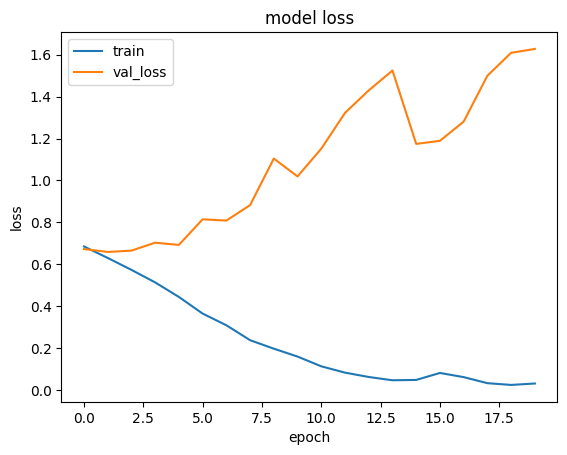

In [106]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

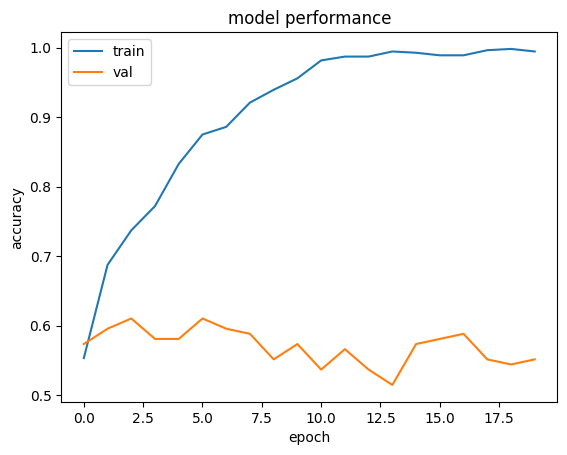

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

### Feedforwards NN

In [87]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=max(len(x) for x in sequences))
max_sequence_length = max(len(x) for x in sequences)

# Load pre-trained GloVe embeddings (replace with the actual file path)
glove_file = r'C:\Users\jklbichami\OneDrive - Valmet\Documents\School\Porgramming\NLP\glove.6B.300d.txt' 
embedding_dim = 300

embeddings_index = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the CNN model
input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_sequence_length,
                            trainable=False)(input_layer)
flat = Flatten()(embedding_layer)
dense_1 = Dense(64, activation = 'relu')(flat)
output_layer = Dense(1, activation='sigmoid')(dense_1)
model = Model(inputs=input_layer, outputs=output_layer)

# Define your learning rate
learning_rate = 0.001  # Adjust this value as needed

# Create an Adam optimizer with the custom learning rate
custom_optimizer = Adam(learning_rate=learning_rate)

# Compile your model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Split your data into train and test sets
from sklearn.model_selection import train_test_split
# label_mapping = {'y': 1, 'n': 0}
# df['Symbol'] = df['Symbol'].map(label_mapping).astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, df['Symbol'], test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
17/17 [==============================] - 1s 54ms/step - loss: 0.6977 - accuracy: 0.5257 - val_loss: 0.7034 - val_accuracy: 0.4926
Epoch 2/10
17/17 [==============================] - 1s 51ms/step - loss: 0.4712 - accuracy: 0.8327 - val_loss: 0.8160 - val_accuracy: 0.4485
Epoch 3/10
17/17 [==============================] - 1s 49ms/step - loss: 0.3187 - accuracy: 0.9154 - val_loss: 0.8890 - val_accuracy: 0.4706
Epoch 4/10
17/17 [==============================] - 1s 48ms/step - loss: 0.1999 - accuracy: 0.9669 - val_loss: 1.0142 - val_accuracy: 0.4926
Epoch 5/10
17/17 [==============================] - 1s 48ms/step - loss: 0.1234 - accuracy: 0.9853 - val_loss: 1.1434 - val_accuracy: 0.5074
Epoch 6/10
17/17 [==============================] - 1s 47ms/step - loss: 0.0750 - accuracy: 0.9963 - val_loss: 1.2646 - val_accuracy: 0.4853
Epoch 7/10
17/17 [==============================] - 1s 50ms/step - loss: 0.0467 - accuracy: 0.9982 - val_loss: 1.3398 - val_accuracy: 0.5074
Epoch 8/10
17

### LSTM

In [105]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input, Dropout, MaxPooling1D, Flatten, LSTM, Concatenate 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=max(len(x) for x in sequences))
max_sequence_length = max(len(x) for x in sequences)

# Load pre-trained GloVe embeddings (replace with the actual file path)
glove_file = r'C:\Users\jklbichami\OneDrive - Valmet\Documents\School\Porgramming\NLP\glove.6B.300d.txt' 
embedding_dim = 300

embeddings_index = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the CNN model
input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_sequence_length,
                            trainable=False)(input_layer)
lstm_layer = LSTM(64)(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# Define your learning rate
# learning_rate = 0.001  # Adjust this value as needed

# Create an Adam optimizer with the custom learning rate
# custom_optimizer = Adam(learning_rate=learning_rate)

# Compile your model with the custom optimizer
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split your data into train and test sets
from sklearn.model_selection import train_test_split
# label_mapping = {'y': 1, 'n': 0}
# df['Symbol'] = df['Symbol'].map(label_mapping).astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, df['Symbol'], test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
17/17 [==============================] - 7s 364ms/step - loss: 0.6850 - accuracy: 0.5533 - val_loss: 0.6728 - val_accuracy: 0.5735
Epoch 2/20
17/17 [==============================] - 6s 349ms/step - loss: 0.6301 - accuracy: 0.6875 - val_loss: 0.6588 - val_accuracy: 0.5956
Epoch 3/20
17/17 [==============================] - 6s 350ms/step - loss: 0.5732 - accuracy: 0.7371 - val_loss: 0.6649 - val_accuracy: 0.6103
Epoch 4/20
17/17 [==============================] - 6s 352ms/step - loss: 0.5134 - accuracy: 0.7721 - val_loss: 0.7030 - val_accuracy: 0.5809
Epoch 5/20
17/17 [==============================] - 6s 350ms/step - loss: 0.4440 - accuracy: 0.8327 - val_loss: 0.6924 - val_accuracy: 0.5809
Epoch 6/20
17/17 [==============================] - 8s 457ms/step - loss: 0.3646 - accuracy: 0.8750 - val_loss: 0.8144 - val_accuracy: 0.6103
Epoch 7/20
17/17 [==============================] - 8s 474ms/step - loss: 0.3089 - accuracy: 0.8860 - val_loss: 0.8085 - val_accuracy: 0.5956
Epoch 

### LSTM + CNN

In [98]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input, Dropout, MaxPooling1D, Flatten, LSTM, Concatenate 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=max(len(x) for x in sequences))
max_sequence_length = max(len(x) for x in sequences)

# Load pre-trained GloVe embeddings (replace with the actual file path)
glove_file = r'C:\Users\jklbichami\OneDrive - Valmet\Documents\School\Porgramming\NLP\glove.6B.300d.txt' 
embedding_dim = 300

embeddings_index = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the CNN model
input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_sequence_length,
                            trainable=False)(input_layer)
lstm_layer = LSTM(64)(embedding_layer)
conv_layer = Conv1D(128, 5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
concatenated = Concatenate()([lstm_layer, pooling_layer])
output_layer = Dense(1, activation='sigmoid')(concatenated)
model = Model(inputs=input_layer, outputs=output_layer)

# Define your learning rate
# learning_rate = 0.001  # Adjust this value as needed

# Create an Adam optimizer with the custom learning rate
# custom_optimizer = Adam(learning_rate=learning_rate)

# Compile your model with the custom optimizer
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split your data into train and test sets
from sklearn.model_selection import train_test_split
# label_mapping = {'y': 1, 'n': 0}
# df['Symbol'] = df['Symbol'].map(label_mapping).astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, df['Symbol'], test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
17/17 [==============================] - 8s 379ms/step - loss: 0.6692 - accuracy: 0.5790 - val_loss: 0.6471 - val_accuracy: 0.6250
Epoch 2/20
17/17 [==============================] - 6s 331ms/step - loss: 0.4024 - accuracy: 0.8989 - val_loss: 0.6283 - val_accuracy: 0.6029
Epoch 3/20
17/17 [==============================] - 6s 333ms/step - loss: 0.2700 - accuracy: 0.9706 - val_loss: 0.6248 - val_accuracy: 0.6176
Epoch 4/20
17/17 [==============================] - 6s 332ms/step - loss: 0.1834 - accuracy: 0.9871 - val_loss: 0.6342 - val_accuracy: 0.6324
Epoch 5/20
17/17 [==============================] - 6s 332ms/step - loss: 0.1201 - accuracy: 0.9945 - val_loss: 0.6830 - val_accuracy: 0.5882
Epoch 6/20
17/17 [==============================] - 6s 334ms/step - loss: 0.0840 - accuracy: 0.9982 - val_loss: 0.6723 - val_accuracy: 0.5956
Epoch 7/20
17/17 [==============================] - 6s 332ms/step - loss: 0.0645 - accuracy: 0.9963 - val_loss: 0.7598 - val_accuracy: 0.5809
Epoch 

### Hugging face model

In [7]:
model_nm = 'lwachowiak/Metaphor-Detection-XLMR'

In [8]:
from transformers import AutoTokenizer
tokz = AutoTokenizer.from_pretrained(model_nm)

C:\Users\Dan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dan\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [9]:
from transformers import pipeline, AutoModelForTokenClassification

label_list= ['literal',"metaphoric"]
label_dict_relations={ i : l for i, l in enumerate(label_list) }

model_metaphor_detection = AutoModelForTokenClassification.from_pretrained(model_nm, id2label=label_dict_relations)

In [32]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Dan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token="<OOV>")

In [37]:
pipeline_metaphors=pipeline("ner", model=model_metaphor_detection, tokenizer=tokz, aggregation_strategy="simple")

In [38]:
metaphor = pipeline_metaphors("Our love is at crossroads and the company is going into hibernation. The bear is sleeping well.")

pipeline_metaphors("Our love is at crossroads and the company is going into hibernation. The bear is sleeping well.")

[{'entity_group': 'literal',
  'score': 0.9999397,
  'word': 'Our love is',
  'start': 0,
  'end': 11},
 {'entity_group': 'metaphoric',
  'score': 0.99959594,
  'word': 'at crossroads',
  'start': 12,
  'end': 25},
 {'entity_group': 'literal',
  'score': 0.99998623,
  'word': 'and the company is',
  'start': 26,
  'end': 44},
 {'entity_group': 'metaphoric',
  'score': 0.9707714,
  'word': 'going into hi',
  'start': 45,
  'end': 58},
 {'entity_group': 'literal',
  'score': 0.6892574,
  'word': 'bern',
  'start': 58,
  'end': 62},
 {'entity_group': 'metaphoric',
  'score': 0.95484346,
  'word': 'ation',
  'start': 62,
  'end': 67},
 {'entity_group': 'literal',
  'score': 0.9999785,
  'word': '. The bear is sleeping well.',
  'start': 67,
  'end': 95}]

In [39]:
for item in metaphor:
    print(item['word'])
    print(item['entity_group'])

Our love is
literal
at crossroads
metaphoric
and the company is
literal
going into hi
metaphoric
bern
literal
ation
metaphoric
. The bear is sleeping well.
literal


In [50]:
# Function to extract metaphors
def find_metaphors(text):
    # Assuming pipeline_metaphors is a function that returns a list of entities
    entities = pipeline_metaphors(text)
    metaphoric_words = [item['word'] for item in entities if item['entity_group'] == "metaphoric"]
    return metaphoric_words

# Create a Pandas DataFrame, assuming df is already created
# If not, you can create it using df = pd.DataFrame(your_data)

# Apply the find_metaphors function to the 'Text' column
df['Metaphors'] = df['Text'].apply(find_metaphors)

# Display the DataFrame
df

,Text,Symbol,Number,Head-word,Metaphors
0,poise is a club .,y,1,poise,[club]
1,destroying alexandria . sunlight is silence,y,4,sunlight,[destroy]
2,feet are no anchor . gravity sucks at the mind,y,1,feet,"[anchor, sucks at]"
3,on the day 's horizon is a gesture of earth,y,5,horizon,[gesture]
4,he said good-by as if good-by is a number .,y,6,good-by,[]
...,...,...,...,...,...
675,as the season of cold is the season of darkness,n,5,cold,[]
676,"else all beasts were tigers ,",y,3,beasts,[]
677,without which earth is sand,n,3,earth,[without]
678,the sky is cloud on cloud,n,2,sky,[]


In [ ]:
filtered_df = df[df['Symbol'] == 'y']

filtered_df

In [53]:
head_word_set = set(filtered_df['Head-word'])

metaphoric_words = [word for words in filtered_df['Metaphors'] for word in words]

matching_words = [word for word in metaphoric_words if word in head_word_set]
num_matches = len(matching_words) / len(filtered_df['Head-word'])

# Print the number of matches
print(f"Number of matches: {num_matches}")

Number of matches: 0.1005586592178771


In [54]:
import pandas as pd

# Assuming 'Head-word' is in string format and 'Metaphors' is in list format
# Create an empty list to store the matching pairs
matches = []

# Create a set of unique words in 'Head-word' for faster lookup
head_word_set = set(filtered_df['Head-word'])

# Iterate through the 'Metaphors' column and find matches
for metaphoric_words in filtered_df['Metaphors']:
    for word in metaphoric_words:
        if word in head_word_set:
            matches.append({'Head-word': word, 'Metaphoric Word': ', '.join(metaphoric_words)})

# Create a DataFrame from the list of matching pairs
matches_df = pd.DataFrame(matches)

# Print the DataFrame with all matches
print(matches_df)


   Head-word                                    Metaphoric Word
0       ways                                               ways
1        war                                                war
2       door                                               door
3       name                                               name
4      heart                                       heart, heart
..       ...                                                ...
31    things                                       things, give
32  distance                        distance, severance, divide
33      back                                               back
34     river  at, zenith, twist, river, na, aches, hides in,...
35     ocean                                              ocean

[36 rows x 2 columns]
